In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import to_hex


################################## Update Parameters
N = 300
rho = 0.25
L = np.sqrt(N/rho)
L2 = L/2
apical = 5*np.pi/12
##################################


# ################################## Set fonts
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": ["cmss"],
#     "text.latex.preamble": r"\usepackage{sfmath}\renewcommand{\familydefault}{\sfdefault}",
# })

In [36]:
################################## Load Data

data = np.load('/Users/leo/Desktop/MD_figs/300_analyzed.npz')
print(data.files)

TEMPS = data['T_']
PE_MEAN = data['PE_m']
s6, s5, s4, s3, s2 = data['s6'], data['s5'],data['s4'],data['s3'],data['s2']
ORDER_PARAMETERS = [s2,s3,s4,s5,s6]
s6SD, s5SD, s4SD, s3SD, s2SD = data['s6SD'], data['s5SD'], data['s4SD'], data['s3SD'], data['s2SD']
ORDER_SD = [s2SD, s3SD, s4SD, s5SD, s6SD]
orientational_time_correlations = data['orientational_timecorrs']
MSDs = data['MSDs']
tau_relax = data['relaxation_times']
TIME = np.linspace(0, 10000, 1000000)

['T_', 'PE_m', 's6', 's5', 's4', 's3', 's2', 's6SD', 's5SD', 's4SD', 's3SD', 's2SD', 'orientational_timecorrs', 'MSDs', 'relaxation_times']


In [37]:
TEMPS = np.append(TEMPS[:-3], [0.21, 0.19, 0.17])

In [38]:
################## Phase Diagram

################## Load PDFs for inset
pdf = np.load('/Users/leo/Desktop/MD_figs/300_s6_0.47_pdf.npy')
bins = np.load('/Users/leo/Desktop/MD_figs/300_s6_0.47_bins.npy')
pdf2 = np.load('/Users/leo/C++/MolecularDynamics/s6_0.39_pdf.npy')
bins2 = np.load('/Users/leo/C++/MolecularDynamics/s6_0.39_bins.npy')

fig, ax = plt.subplots(figsize = (10,8))

colors = ['k', 'r', 'darkgreen', 'royalblue','purple']
colors.reverse()
alphas = [0.5, 0.5, 0.5, 0.5, 1]
for i in range(len([s6,s5,s4,s3,s2])):
    ax.scatter(TEMPS, ORDER_PARAMETERS[i], color = colors[i], marker = 'o', s = 50, alpha = alphas[i])
    ax.text(0.43, 0.33+0.04*i, rf"${{m = {i+2}}}$", fontsize=20, color=colors[i])

################ Turn on for shadded error region

    # plt.plot(TEMPS, ORDER_PARAMETERS[i], color=colors[i], alpha=alphas[i]*0.8, lw=1)
# for i in range(len([s6SD,s5SD,s4SD,s3SD,s2SD])):
#     ax.errorbar(TEMPS, ORDER_PARAMETERS[i], ORDER_SD[i]/np.sqrt(N), marker = 'None', ls = 'None',color = colors[i], capsize=7, elinewidth=2, capthick=1.5)



ax.scatter(TEMPS, ORDER_PARAMETERS[-1], color = colors[-1], marker = 'o', s = 100, alpha = alphas[-1])
ax.fill_between(TEMPS,ORDER_PARAMETERS[-1]-ORDER_SD[-1], ORDER_PARAMETERS[-1]+ORDER_SD[-1],
                color=colors[-1], alpha=0.1, label='std dev')
plt.plot(TEMPS, ORDER_PARAMETERS[-1], color = colors[-1], lw = 2)


plt.tick_params('both', size = 8, width = 1.5, direction = 'in')
plt.xlabel('$$k_BT/\\epsilon$$', fontsize = 25, color = 'dimgray')
plt.ylabel('$$\\langle|s_m|\\rangle$$', fontsize = 25, color = 'dimgray')




################ INSET 

axin = ax.inset_axes([0.2, 0.25, 0.5,0.4])
axin.scatter(bins2, pdf2, color = 'k', marker = 'o', edgecolor = 'k', linewidth = 1, s = 50)
axin.scatter(bins, pdf, color = 'w', marker = 'o', edgecolor = 'k', linewidth = 1, s = 50)

axin.set_xlabel('$|s_6|$',  fontsize = 20, color = 'dimgray')
for spine in axin.spines.values():
    spine.set_linewidth(2)
    spine.set_color('dimgray')
axin.text(0.14, 0.1, '$k_BT/\\epsilon=$', fontsize = 17, color = 'k')
axin.text(0.165, 0.085, '0.3998', fontsize = 17, color = 'k')
axin.text(0.165, 0.074, '0.4680', fontsize = 17, color = 'k')
axin.scatter(0.138, 0.089, color = 'k', s = 50)
axin.scatter(0.138, 0.078, color = 'w', s = 50, edgecolor = 'k', linewidth = 1)
ax.text(0.19, 0.40, "$P(|s_6|)$", fontsize = 18,color = 'dimgray')


############### AXES, LABELS, SPINES 
plt.tick_params('both', size = 8, width = 1.5, direction = 'in')
plt.xlabel('$$k_BT/\\epsilon$$', fontsize = 25, color = 'dimgray')
plt.ylabel('$$\\langle|s_m|\\rangle$$', fontsize = 25, color = 'dimgray')


ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)
    spine.set_color('dimgray')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

axin.tick_params(axis='both', colors='dimgray') 
ax.tick_params(axis='both', colors='dimgray') 

# plt.savefig("/Users/leo/Desktop/MD_figs/POSTER/300_s_m.png", dpi = 400)
plt.show()

FileNotFoundError: Matplotlib's TeX implementation searched for a file named 'cmss17.tfm' in your texmf tree, but could not find it

<Figure size 1000x800 with 1 Axes>

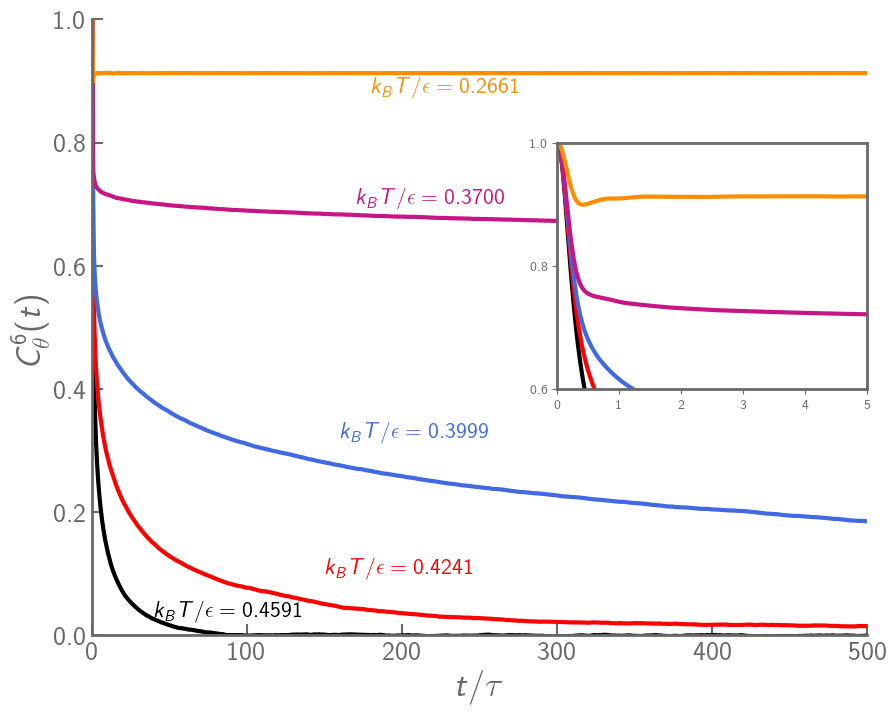

In [16]:
############# C_6^theta (t) Time Correlation Functions

fig, ax = plt.subplots(figsize = (10, 8))
# colors = ['#000004', '#1a0b3f', '#3a0b5f', '#631464', '#943158',
#  '#c04546', '#e2612d', '#f48211', '#fba407', '#fdbf22', '#fdde55']

colors = ['k', 'red', 'royalblue', 'mediumvioletred', 'darkorange']
indices = [0, 2, 3, 5, -1]
for n in range(len(indices)): 
    i = indices[n]
    ax.plot(np.linspace(0, 10000, 1000000)[:], orientational_time_correlations[i][:], color = colors[n], linewidth = 3)
    # ax.text(460, 0.1 + n*0.05,
    #         f"{TEMPS[i]:.4f}",
    #         color = colors[n],
    #         bbox=dict(facecolor='white', edgecolor='None', boxstyle='round,pad=0.3'), fontsize = 16)
plt.xlim(0, 500)
plt.ylim(0, 1.0)


plt.text(180,0.88, '$$k_BT/\\epsilon = 0.2661$$', fontsize = 16, color = colors[-1])
plt.text(170,0.70, '$$k_BT/\\epsilon = 0.3700$$', fontsize = 16, color = colors[-2])
plt.text(160,0.32, '$$k_BT/\\epsilon = 0.3999$$', fontsize = 16, color = colors[-3])
plt.text(150,0.1, '$$k_BT/\\epsilon = 0.4241$$', fontsize = 16, color = colors[-4])
plt.text(40,0.03, '$$k_BT/\\epsilon = 0.4591$$', fontsize = 16, color = colors[0])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tick_params('both', size = 8, width = 1.5, direction = 'in' )
plt.ylabel('$$C^6_{\\theta}(t)$$', fontsize = 25, color = 'dimgray')
plt.xlabel('$$t/\\tau$$', fontsize = 25, color = 'dimgray')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)
    spine.set_color('dimgray')
ax.tick_params(axis='both', colors='dimgray')  
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

axin = ax.inset_axes([0.6, 0.4, 0.4,0.4])
for n in range(len(indices)): 
    i = indices[n]
    axin.plot(np.linspace(0, 10000, 1000000)[:], orientational_time_correlations[i][:], color = colors[n], linewidth = 3)
axin.set_xlim(0,5)
axin.set_ylim(0.6,1)
axin.set_xlabel('')

for spine in axin.spines.values():
    spine.set_linewidth(2)
    spine.set_color('dimgray')
axin.set_yticks(np.linspace(0.6, 1.0, 3))
axin.tick_params(axis='both', colors='dimgray')  
# plt.savefig("/Users/leo/Desktop/MD_figs/POSTER/C_6.svg")

In [21]:
T

array([ nan,  nan,  nan, 0.21, 0.19, 0.17])

<>:71: SyntaxWarning: invalid escape sequence '\e'
<>:71: SyntaxWarning: invalid escape sequence '\e'
/var/folders/4x/bmt6t_kn6kj7kj6_jg6724p00000gn/T/ipykernel_1426/3986188664.py:71: SyntaxWarning: invalid escape sequence '\e'
  ax.set_xlabel('$k_B T / \epsilon$', fontsize=25, color='dimgray')


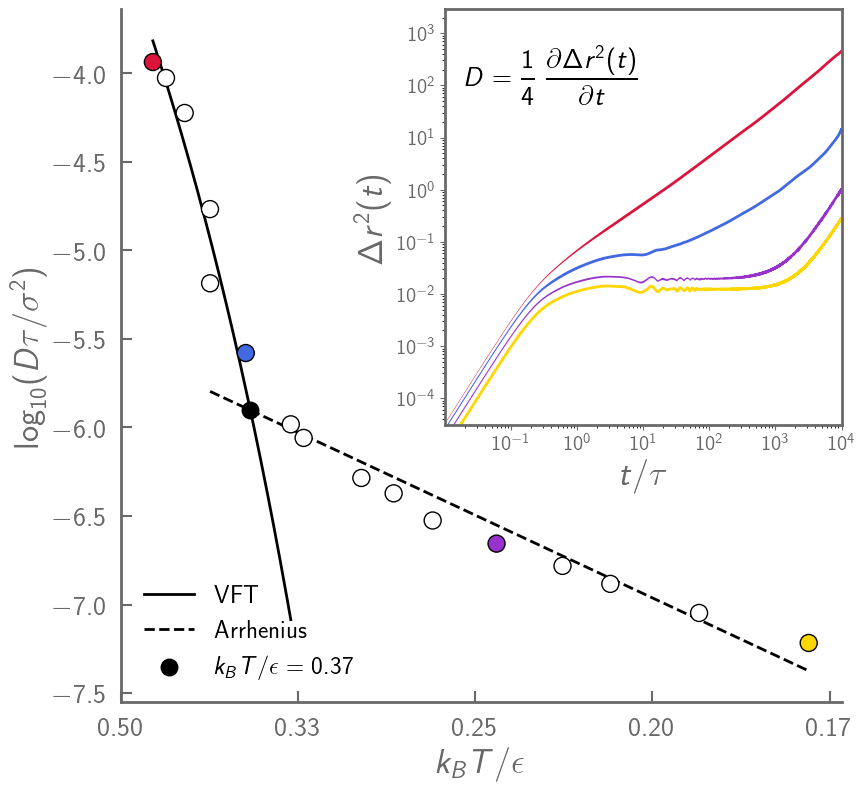

-4.6283356752937 0.4668586294948976
6.311915406202242e-16 1.0003053723428827 0.19698656291817512


In [23]:
############## Mean-Squared Displacement + Diffusion Constants, Vogel-Fulcher Tammann, Arrhenius Fitting

from matplotlib.ticker import FuncFormatter
from scipy.optimize import curve_fit

diffusive = MSDs[:, 300000:600000]### Set Range
d_ = np.mean(np.diff(diffusive, axis=1), axis=1)
D = d_ / 4

def vft(T, logD0, A, T0):
    return logD0 - A / (T - T0)

def arrhenius(T, logD0, Ea):
    return logD0 - Ea / T
fit_vft, _ = curve_fit(
    vft,
    TEMPS[0:5],
    np.log10(D[0:5]),
    p0=[1, 0.1, 0.1],
    bounds=([0, 0, 0], [5, 10, TEMPS[0] - 1e-3])
)
fit_arr, _ = curve_fit(
    arrhenius,
    TEMPS[5:],
    np.log10(D[5:]),
    p0=[-1, 1],
    bounds=([-5, 0], [5, 50])
)

### INTERSECTION
T_grid = np.linspace(0.4, 0.33, 2000)
vftf  = vft(T_grid, *fit_vft)
arrf  = arrhenius(T_grid, *fit_arr)
i = np.argmin(np.abs(vftf - arrf))

colors = [
    'Crimson', 'w', 'w', 'w', 'w',
    'royalblue', 'w', 'w', 'w', 'w',
    'w', 'darkorchid', 'w', 'w', 'w', 'gold'
]
# colors = [
#     '#0a0e3c', '#172a64', '#2b438a', '#3d5aa9', '#514fc0',
#     '#6632c3', '#812cb9', '#9b2ba7', '#b83891', '#d14478',
#     '#e24f5d', '#ed6245', '#f47535', '#f6852c', '#f27825', '#de5a1d'
# ]

fig, ax = plt.subplots(figsize=(12, 9))
T_fit_range1 = np.linspace(TEMPS[0], TEMPS[6], 300)
ax.plot(1 / T_fit_range1, vft(T_fit_range1, *fit_vft), color='k', lw=2, label='VFT', zorder =1)

# Plot Arrhenius fit
T_fit_range2 = np.linspace(TEMPS[4], TEMPS[-1], 300)
ax.plot(1 / T_fit_range2, arrhenius(T_fit_range2, *fit_arr), color='k', lw=2, ls='--', label='Arrhenius', zorder = 2)
ax.scatter(1 / TEMPS, np.log10(D),facecolor=colors[:len(D)], edgecolor = 'k', s=150, zorder = 3)
ax.scatter(1/T_grid[i], vftf[i], color = 'k', edgecolor = 'k', linewidth = 1.5, s = 130, zorder = 4, label = r'$k_BT/\epsilon = 0.37$')

axin = ax.inset_axes([0.45, 0.4, 0.55, 0.6])
for i in range(len(MSDs)):
    axin.loglog(TIME, MSDs[i], lw=2, color=colors[i])
axin.set_xlim(TIME[1], 1e4)
axin.set_ylim(MSDs[0][1],)
axin.set_xlabel("$t/\\tau$", fontsize=25, color='dimgray')
axin.set_ylabel("$\\Delta r^2(t)$", fontsize=25, color='dimgray')
axin.tick_params(axis='both', colors='dimgray', labelsize=15)
for spine in axin.spines.values():
    spine.set_linewidth(2)
    spine.set_color('dimgray')
axin.text(0.02, 100, r"$$D = \frac{1}{4} \ \frac{\partial \Delta r^2(t)}{\partial t}$$", fontsize = 20, color = 'k')


ax.set_xlabel('$k_B T / \epsilon$', fontsize=25, color='dimgray')
ax.set_ylabel('$\\log_{10}(D\\tau/\\sigma^2)$', fontsize=25, color='dimgray')
ax.tick_params(axis='both', colors='dimgray', pad=10, labelsize=20, size=8, width=1.5, direction='in')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{1/x:.2f}"))
ax.set_aspect('equal')


#### SPINES
for spine in ax.spines.values():
    spine.set_linewidth(2)
    spine.set_color('dimgray')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim(2,)
ax.legend(fontsize=18, frameon=False, loc='lower left')

# plt.savefig("/Users/leo/Desktop/MD_figs/POSTER/MSD_Diffusion.svg")
plt.show()

print(*fit_arr)
print(*fit_vft)


In [4]:
#### Order Parameter Timeseries

d3 = np.load('/Users/leo/Desktop/MD_figs/sm6s.npz')
s6s = np.array(d3['s6s'])
s6rolling = np.array(d3['s6rolling'])

time = np.linspace(0, 10000, 1000000)
colors = np.array(['royalblue', 'crimson', 'darkorange'])
colors2 = np.array(['lightsteelblue', 'mistyrose', 'peachpuff'])


fig, axs = plt.subplots(3, 1, sharex=True, figsize=(12, 12))
fig.subplots_adjust(hspace=0)

yticks = [0.0, 0.25, 0.5, 0.75]  

for i, ax in enumerate(axs):
    ax.scatter(time, s6s[i], color=colors2[i], s=0.05, alpha=0.02)
    ax.plot(time[5000:s6rolling[i].size+5000], s6rolling[i], color=colors[i], lw=2)

    ax.set_ylim(0, 1.0)
    ax.set_xlim(0, 10000)

    ax.set_yticks(yticks)
    ax.tick_params(axis='both', size=8, width=1.5, direction='in',
                   colors='dimgray', pad=10, labelsize=25,
                   right=True, left=True)
    for side in ['top', 'bottom', 'left', 'right']:
        ax.spines[side].set_visible(True)
        ax.spines[side].set_color('dimgray')
        ax.spines[side].set_linewidth(2)
axs[0].set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])
axs[1].set_ylabel(r'$|s_6(t)|$', fontsize=30, color='dimgray')


axs[0].text(7000,0.8, '$k_BT/\\epsilon$ = 0.4613', fontsize = 25, color = colors[0])
axs[1].text(7000,0.8, '$k_BT/\\epsilon$ = 0.3999', fontsize = 25, color = colors[1])
axs[2].text(7000,0.8, '$k_BT/\\epsilon$ = 0.2224', fontsize = 25, color = colors[2])

axs[2].set_xlabel(r'$t/\tau$', fontsize=30, color='dimgray')

plt.savefig('/Users/leo/Desktop/MD_figs/POSTER/fluctuations.png', dpi = 400)
plt.show()


FileNotFoundError: Matplotlib's TeX implementation searched for a file named 'cmss17.tfm' in your texmf tree, but could not find it

Error in callback <function _draw_all_if_interactive at 0x139de51c0> (for post_execute), with arguments args (),kwargs {}:


FileNotFoundError: Matplotlib's TeX implementation searched for a file named 'cmss17.tfm' in your texmf tree, but could not find it

FileNotFoundError: Matplotlib's TeX implementation searched for a file named 'cmss17.tfm' in your texmf tree, but could not find it

<Figure size 1200x1200 with 3 Axes>

In [125]:
### Obtain VFT Arrhenius Intersection Temp

# T_grid = np.linspace(0.4, 0.33, 2000)
# vftf  = vft(T_grid, *fit_vft)
# arrf  = arrhenius(T_grid, *fit_arr)
# i = np.argmin(np.abs(vftf - arrf))
# print("Intersection temp", T_grid[i])

In [5]:
##### Plot g(r)s

reds = ['#f9c0c0', '#f4a0a0', '#ec8080',
          '#d04040', '#b03030', '#701010']
reds.reverse()
plt.figure(figsize = (6,10))
plot_ind = [0, 1,2,7]
for i in range(len(plot_ind)):
    plt.plot(np.linspace(0, g_r[i].size*0.05,  g_r[i].size), g_r[g_r[:,0].size-1-i, :]+ i*4, linewidth = 2, c = reds[i], alpha = 0.7)
    plt.text(6, 10+ i*0.7,
             "$k_BT/\\varepsilon = $" + f"{temps[g_r[:,0].size-1-i]:.3f}",
             color = reds[i],
             bbox=dict(facecolor='white', edgecolor='None', boxstyle='round,pad=0.3'), fontsize = 13)
plt.xlabel(f"$r/\\sigma$", fontsize = 15)
plt.ylabel("$g(r)$", fontsize = 15)
plt.xlim(0, 9)
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(3)

# plt.savefig("/Users/leo/Desktop/MD_figs/FULL_RUN_300/g(r).png", dpi = 1200)
plt.show()

NameError: name 'g_r' is not defined

<Figure size 600x1000 with 0 Axes>

#### Scaled Particle Theory

In [7]:
#### Load MonteCarlo Data

area5pi12 = np.load('/Users/leo/C++/MolecularDynamics/2dLW/scaled_particle_theory/A_excl/thermal_area_5pi12.npz.npy')
rmean5pi12 = np.load('/Users/leo/C++/MolecularDynamics/2dLW/scaled_particle_theory/A_excl/thermal_area_rollingmean_0.5pi.npz.npy')

areapi2 = np.load('/Users/leo/C++/MolecularDynamics/2dLW/scaled_particle_theory/A_excl/thermal_area_pi2.npz.npy')
rmeanpi2 = np.load('/Users/leo/C++/MolecularDynamics/2dLW/scaled_particle_theory/A_excl/thermal_area_rollingmean_pi2.npz.npy')

area7pi12 = np.load('/Users/leo/C++/MolecularDynamics/2dLW/scaled_particle_theory/A_excl/thermal_area_7pi12.npz.npy')
rmean7pi12 = np.load('/Users/leo/C++/MolecularDynamics/2dLW/scaled_particle_theory/A_excl/thermal_area_rollingmean_7pi12.npz.npy')

In [8]:
#### Angle axes for different angular resolutions

x = np.linspace(0,2,area5pi12.size)
x1 = np.linspace(0,2,areapi2.size)

<>:13: SyntaxWarning: invalid escape sequence '\ '
<>:13: SyntaxWarning: invalid escape sequence '\ '
/var/folders/4x/bmt6t_kn6kj7kj6_jg6724p00000gn/T/ipykernel_1139/48643387.py:13: SyntaxWarning: invalid escape sequence '\ '
  plt.text(1.27, 11.97, "$$\\alpha = 5\\pi/12 \  \\rm(2dLW)$$", fontsize = 15)


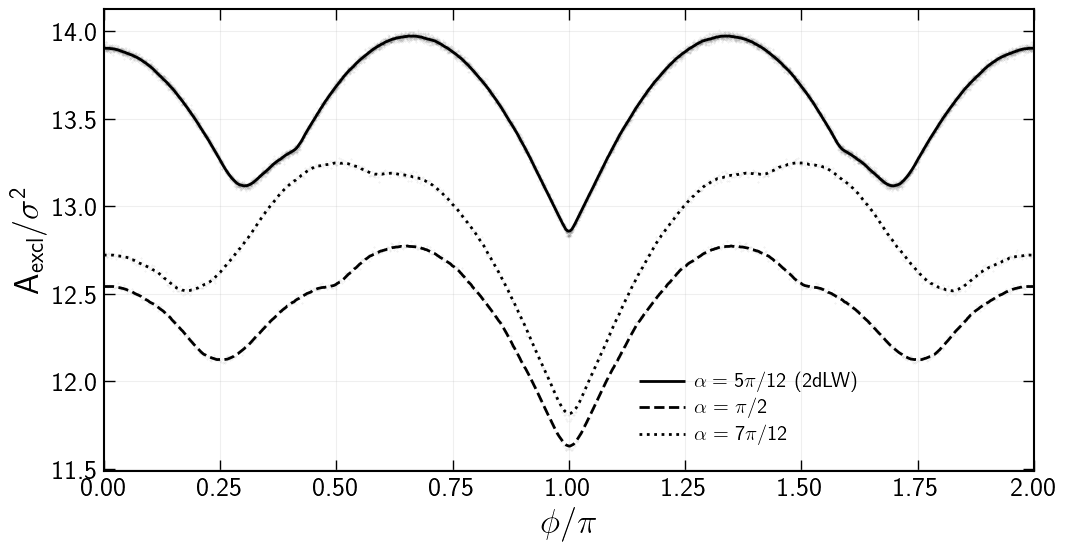

In [11]:
####### Plot A_excl for all apical angles

plt.figure(figsize = (12, 6))
plt.scatter(x, area5pi12, s = 0.1, alpha = 0.1, color = 'k')
plt.plot(x, rmean5pi12, color = 'k', lw = 2,linestyle = '-')
plt.scatter(x1, areapi2,  s = 0.1, alpha = 0.1, color = 'k')
plt.plot(x1, rmeanpi2, color = 'k', lw = 2,linestyle = '--')
plt.scatter(x1, area7pi12,  s = 0.1, alpha = 0.1, color = 'k')
plt.plot(x1, rmean7pi12, color = 'k', lw = 2,linestyle = 'dotted')
plt.xlim(0, 2)

plt.hlines(12, 1.15, 1.25, color = 'k', linewidth = 2, linestyle = '-')
plt.text(1.27, 11.97, "$$\\alpha = 5\\pi/12 \  \\rm(2dLW)$$", fontsize = 15)
plt.hlines(11.85, 1.15, 1.25, color = 'k', linewidth = 2, linestyle = '--')
plt.text(1.27, 11.82, "$$\\alpha = \\pi/2$$", fontsize = 15)
plt.hlines(11.7, 1.15, 1.25, color = 'k', linewidth = 2, linestyle = 'dotted')
plt.text(1.27, 11.67, "$$\\alpha = 7\\pi/12$$", fontsize = 15)



plt.xlabel("$\\phi/\\pi$", fontsize = 25)
plt.ylabel("$\\rm A_{\\rm excl}/\\sigma^2$", fontsize = 25)
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
plt.tick_params('both', size = 8, width = 1, direction = 'in' )
ax.tick_params(bottom=True, top=True, left=True, right=True, direction='in')
plt.grid('true', alpha = 0.2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('/Users/leo/Desktop/MD_figs/A_excl_all_new.png', dpi = 400)
plt.show()

### Finite-Sized Scaling

In [3]:
#### Get all data 

data300 = np.load(f'/Users/leo/Desktop/MD_figs/300_analyzed.npz')
data768 = np.load(f'/Users/leo/Desktop/MD_figs/768_analyzed.npz')
data108 = np.load(f'/Users/leo/Desktop/MD_figs/108_analyzed.npz')
print(data300)

NpzFile '/Users/leo/Desktop/MD_figs/300_analyzed.npz' with keys: T_, PE_m, s6, s5, s4...


In [4]:
s6300 = data300['s6']
temps300 = data300['T_']
s6768 = data768['s6']
temps768= data768['T_']
s6108 = data108['s6']
temps108 = data108['T_']

s6300SD = data300['s6SD']
s6768SD = data768['s6SD']
s6108SD = data108['s6SD']

In [5]:
temps300 = temps300[:-3]
s6300 = s6300[:-3]

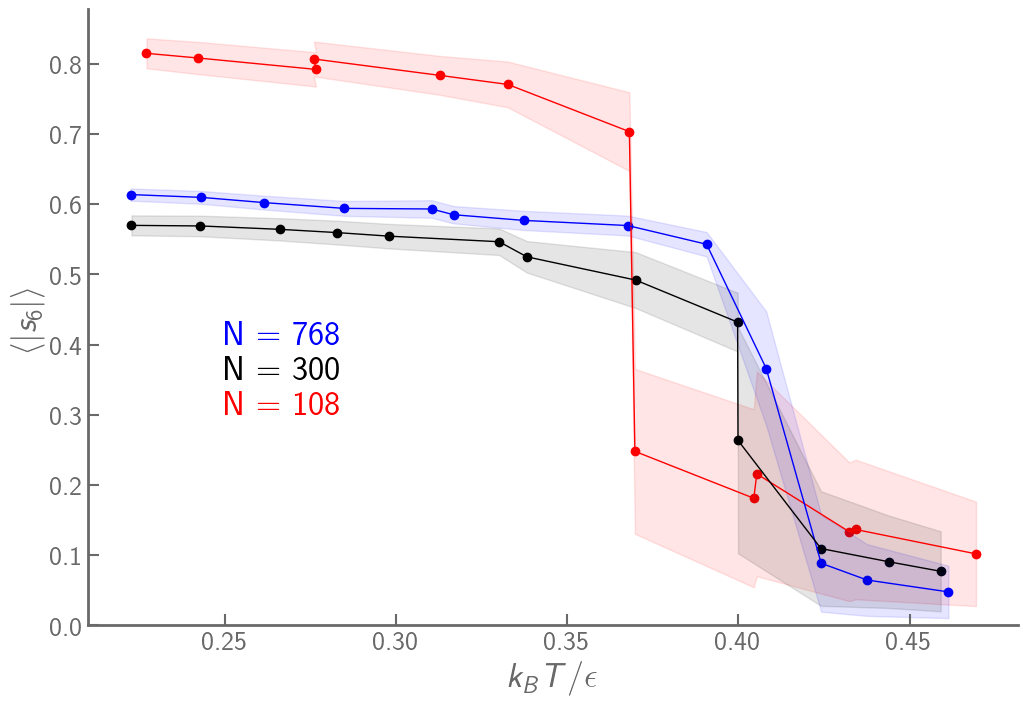

In [26]:
#### Plot Phase Diagrams

fig, ax = plt.subplots(figsize = (12, 8))

ax.scatter(temps300, s6300, color = 'k')
ax.plot(temps300, s6300, color = 'k', lw = 1, zorder = 5)
ax.scatter(temps768, s6768, color = 'b')
ax.plot(temps768, s6768, color = 'b', lw = 1, zorder = 4)
ax.scatter(temps108, s6108, color = 'r')
ax.plot(temps108, s6108, color = 'r', lw = 1, zorder = 3)


ax.fill_between(temps300,s6300-s6300SD[:-3], s6300+s6300SD[:-3],
                color='k', alpha=0.1, zorder = 2)

ax.fill_between(temps768,s6768-s6768SD, s6768 + s6768SD,
                color='b', alpha=0.1, zorder = 1)

ax.fill_between(temps108,s6108-s6108SD, s6108+s6108SD,
                color='r', alpha=0.1, zorder = 0)


############### AXES, LABELS, SPINES 
plt.tick_params('both', size = 8, width = 1.5, direction = 'in')
plt.xlabel('$$k_BT/\\epsilon$$', fontsize = 25, color = 'dimgray')
plt.ylabel('$$\\langle|s_6|\\rangle$$', fontsize = 25, color = 'dimgray')


ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)
    spine.set_color('dimgray')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.text(0.25, 0.4, 'N = 768', fontsize = 25, color = 'b')
plt.text(0.25, 0.35, 'N = 300', fontsize = 25, color = 'k')
plt.text(0.25, 0.3, 'N = 108', fontsize = 25, color = 'r')


plt.ylim(0,)
ax.tick_params(axis='both', colors='dimgray')  # or any hex, e.g. '#444444'

# plt.savefig("/Users/leo/Desktop/MD_figs/POSTER/messy_scaling.svg")
plt.show()

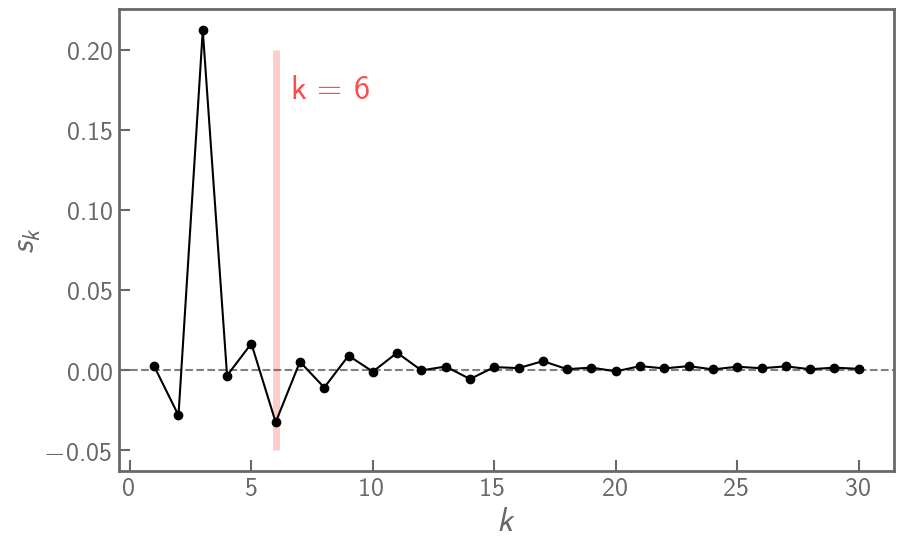

Most negative s_k is at k = 6, s_k = -0.032540
[ 1.35816662e+01  2.40776468e-03 -2.82441801e-02  2.12186717e-01
 -3.38487939e-03  1.66038167e-02 -3.25396147e-02  5.22235505e-03
 -1.08830688e-02  9.03492795e-03 -9.45283578e-04  1.08502985e-02
 -1.65416343e-04  2.25145114e-03 -5.54474574e-03  1.89301661e-03
  1.26639518e-03  5.63475724e-03  5.90865118e-04  1.60495919e-03
 -7.77223066e-04  2.50165061e-03  1.08133867e-03  2.51188941e-03
  4.47271013e-04  2.13152319e-03  1.17498003e-03  2.36934459e-03
  5.53882365e-04  1.57033276e-03  8.04336123e-04]


In [122]:
### Compute Fourier Coefficients for A_excl, find most negative mode

A_excl_phi = np.load('/Users/leo/C++/MolecularDynamics/2dLW/scaled_particle_theory/A_excl/thermal_area_rollingmean_0.5pi.npz.npy')

# A_excl_phi = rmean7pi12
N = A_excl_phi.size
phi = np.linspace(0, 2*np.pi, A_excl_phi.size)
dphi = 2 * np.pi / N

kmax = 30  
s_k = np.zeros(kmax+1)

for k in range(kmax+1):
    s_k[k] = (1/(2*np.pi)) * np.sum(A_excl_phi * np.cos(k * phi)) * dphi

plt.figure(figsize=(10,6))
plt.plot(np.arange(kmax+1)[1:], s_k[1:], marker='o', color='black', zorder = 1)
plt.axhline(0, ls='--', color='gray', zorder = 0)


############### AXES, LABELS, SPINES 
plt.tick_params('both', size = 8, width = 1.5, direction = 'in')
plt.xlabel('$$k$$', fontsize = 25, color = 'dimgray')
plt.ylabel('$$s_k$$', fontsize = 25, color = 'dimgray')


ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)
    spine.set_color('dimgray')
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax.tick_params(axis='both', colors='dimgray')  
ax.vlines(6, -0.05, 0.20, color = 'r', alpha = 0.2, zorder = 0, linewidth = 5)
ax.text(6.7, 0.17, 'k = 6', color = 'r', alpha = 0.7,fontsize = 25)
# plt.savefig("/Users/leo/Desktop/MD_figs/POSTER/fourier_coeffs.svg")
# plt.ylim(-0.05,)
plt.show()

###  Most Negative mode
k_min = np.argmin(s_k[1:]) + 1
print(f"Most negative s_k is at k = {k_min}, s_k = {s_k[k_min]:.6f}")
print(s_k)

In [126]:
### Compute thermal area 

apical = 5*np.pi/12
a_thermal = np.cos(apical/2)*np.sin(apical/2) + (2*np.pi  - apical)/(2*np.pi)*(np.pi*0.5**2) +2*(2*np.pi  - (np.pi/2 - apical)/2)/(2*np.pi)*(np.pi*0.5**2)
print(a_thermal - np.pi*0.5**2*3)

0.28661337229517203


In [2]:
import scipy.spatial
import numpy as np
from scipy.spatial import voronoi_plot_2d


x_COM = np.load('/Users/leo/C++/MolecularDynamics/300long_x_COM.npy')
y_COM = np.load('/Users/leo/C++/MolecularDynamics/300long_y_COM.npy')

array([[-10.53655573,   9.47298109,   0.7617097 , ...,  10.65500295,
         -9.26273584, -15.2042636 ],
       [-10.52999228,   9.46982352,   0.76110889, ...,  10.65678917,
         -9.26193865, -15.20150611],
       [-10.52336347,   9.46667163,   0.76073218, ...,  10.65828229,
         -9.26123213, -15.19869828],
       ...,
       [-13.31913505,  -3.68657075, -15.48812645, ...,  13.57068998,
        -15.72780307, -10.61445299],
       [-13.318156  ,  -3.68613002, -15.49245987, ...,  13.5731345 ,
        -15.7292456 , -10.62400405],
       [-13.31795001,  -3.68576671, -15.49667504, ...,  13.57553447,
        -15.73065877, -10.63341491]], shape=(1000000, 300))

In [4]:
np.save('/Users/leo/C++/MolecularDynamics/300long_0.47T_x_COM.bin', x_COM)
np.save('/Users/leo/C++/MolecularDynamics/300long_0.47T_y_COM.bin', y_COM)

In [3]:
xt= x_COM[-1]
yt = y_COM[-1]
stacked = np.stack((xt,yt),axis = 1)
stacked



array([[-13.31795001,   0.36618964],
       [ -3.68576671,   7.6157377 ],
       [-15.49667504,  -8.32971984],
       [ -7.31284475, -14.34455566],
       [ 12.03226884, -10.50460861],
       [-13.12401759,  -3.76541071],
       [ 15.26231885,  13.7185708 ],
       [ -8.9664519 , -14.73644157],
       [ -4.03077408,   2.550816  ],
       [  9.30724965,  -6.62953685],
       [ -6.609438  ,   7.79310858],
       [ 16.53365198,   3.32372083],
       [ -0.73877034,   8.32107981],
       [  8.77093449,  14.42437595],
       [ -7.12793405,  -2.69086064],
       [  6.59524312,  13.95381708],
       [ -8.18107722,  -4.38688748],
       [  2.92255423,   7.54636983],
       [  4.34588341, -16.90792643],
       [ -3.4465315 ,  -2.94619647],
       [ -9.68832695,  11.66799232],
       [ -5.55026346,  11.8430445 ],
       [ -8.78963064,   2.75118566],
       [  4.58778788, -12.91768158],
       [-17.01948189,  17.13812814],
       [ -5.58165144,  -8.33483597],
       [  2.03028751, -16.5037173 ],
 

In [4]:
stacked = np.column_stack([xt, yt])  # central image (N, 2)
for i in range(-1, 2):
    for j in range(-1, 2):
        if not (i == 0 and j == 0):  # skip central copy
            st = np.column_stack([xt + i*L, yt + j*L])  # shift coords
            stacked = np.vstack([stacked, st])          # append new block

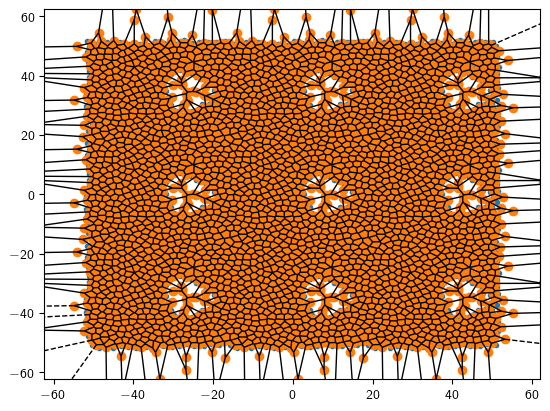

[np.int32(57), np.int32(100), np.int32(165), np.int32(180), np.int32(238), np.int32(298)]


In [10]:
def load_file(filename):
    data = np.fromfile(filename, dtype=np.float64)
    assert data.size % N == 0, "File size does not match expected number of molecules"
    num_frames = data.size // N

    return data.reshape((num_frames, N))  # shape: (frames, molecules)

In [28]:
temps = ['0.45', '0.43', '0.41', '0.39', '0.37', '0.35', '0.33', '0.31', '0.29', '0.27', '0.25','0.23', '0.21', '0.19', '0.17']
# temps = ['0.47']

# for temp in temps:
#     x_COM = load_file('/Volumes/LL_DISK/108,300,768/300long_'+temp+'T_x_COM.bin')
#     y_COM = load_file('/Volumes/LL_DISK/108,300,768/300long_'+temp+'T_y_COM.bin')
#     np.save('/Users/leo/C++/MolecularDynamics/300npy/300_'+temp+'T_x_COM.npy', x_COM[-1000000:,:])
#     np.save('/Users/leo/C++/MolecularDynamics/300npy/300_'+temp+'T_y_COM.npy', y_COM[-1000000:,:])
# x = np.load('/Users/leo/C++/MolecularDynamics/300npy/300_0.47T_x_COM.npy')
# y = np.load('/Users/leo/C++/MolecularDynamics/300npy/300_0.47T_y_COM.npy')


In [27]:
y.shape

(1000000, 300)

In [21]:
np.load('/Users/leo/C++/MolecularDynamics/0.47_x_COM.bin')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/leo/C++/MolecularDynamics/0.47_x_COM.bin'

In [3]:
temps = ['0.47', '0.45', '0.43', '0.41', '0.39', '0.37', '0.35', '0.33', '0.31', '0.29', '0.27', '0.25','0.23', '0.21', '0.19', '0.17']

MSDs1000 = []
for temp in temps: 
    MSDs1000.append(np.load('/Users/leo/C++/MolecularDynamics/MSD_CR/MSD_'+temp+'.npy'))
MSDs10 = []
for temp in temps: 
    MSDs10.append(np.load('/Users/leo/C++/MolecularDynamics/MSD_CR/MSD10_'+temp+'.npy'))

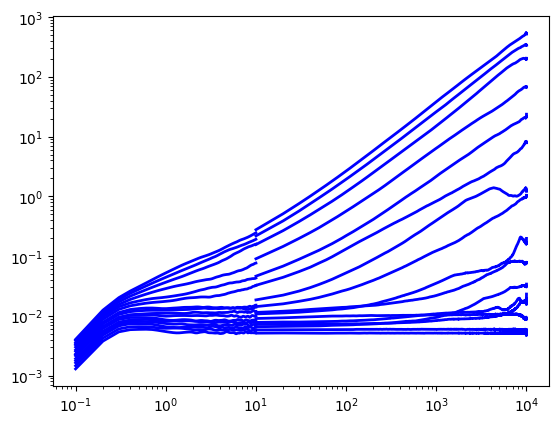

In [8]:
for m in MSDs1000: 
    plt.loglog(np.linspace(10, 10+m.size*10, m.size), m, color = 'b', linewidth = 2)
for mm in MSDs10: 
    mm = np.array(mm[mm!=0])
    plt.loglog(np.linspace(0.1, 10, mm.size), mm, color = 'b', linewidth = 2)


# plt.xlabel('$t/\\tau$', fontsize = 15)
# plt.ylabel('$\\Delta r^2_{ CR}$(t)', fontsize = 15)
# plt.text(10, 100, '$k_BT/\\epsilon = 0.4680$')
plt.loglog
ax = plt.gca()
# ax.set_aspect(0.5)

In [19]:
MSDs= []
for temp in ["0.47"]:
    MSDs.append(load_file("/Users/leo/C++/MolecularDynamics/MSD_CR//MSDfull_"+temp+".bin"))

AssertionError: File size does not match expected number of molecules

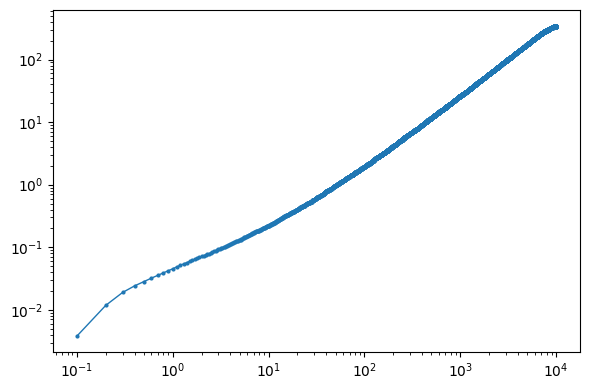

In [36]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
# temps = ["0.47", "0.45", "0.43", "0.41", "0.39", "0.37", "0.35", "0.33", "0.31", "0.29", "0.27", "0.25", "0.23", "0.21"]
temps = ["0.45"]
for temp in temps:
    outpath = f"/Users/leo/C++/MolecularDynamics/MSD_CR/MSDfull_{temp}.bin"

    T       = 1000000
    dt_steps = 10
    total    = (T - 1) // dt_steps   # expected output length

    msd = np.fromfile(outpath, dtype=np.float64)

    # Build corresponding dt axis
    dt_vals = np.arange(1, total+1) * dt_steps * 0.01

    plt.loglog(dt_vals, msd, marker="o", markersize=2, lw=1)
    # plt.xlabel(r"$\Delta t$")
    # plt.ylabel(r"MSD$_{\rm cage-rel}$")
    plt.tight_layout()
plt.show()


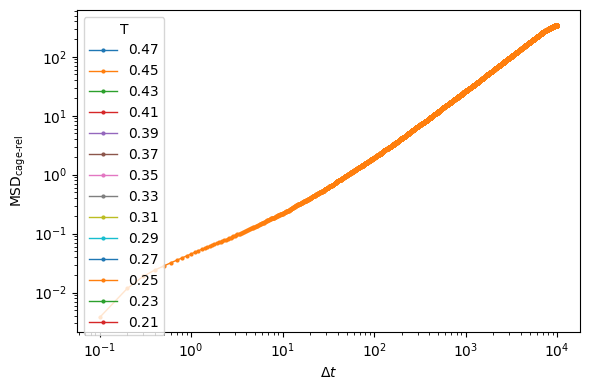

In [38]:
import numpy as np
import matplotlib.pyplot as plt

temps = ["0.47", "0.45", "0.43", "0.41", "0.39", "0.37", "0.35", "0.33", "0.31", "0.29", "0.27", "0.25", "0.23", "0.21"]
dt_step = 10
scale = 1e-2

plt.figure(figsize=(6,4))
for temp in temps:
    outpath = f"/Users/leo/C++/MolecularDynamics/MSD_CR/MSDfull_{temp}.bin"
    msd = np.fromfile(outpath, dtype=np.float64)
    dt_vals = np.arange(1, msd.size + 1) * dt_step * scale
    plt.loglog(dt_vals, msd, marker="o", markersize=2, lw=1, label=temp)

plt.xlabel(r"$\Delta t$")
plt.ylabel(r"$\mathrm{MSD}_{\mathrm{cage\text{-}rel}}$")
plt.legend(title="T")
plt.tight_layout()
plt.show()


In [35]:
msd = np.fromfile("/Users/leo/C++/MolecularDynamics/MSD_CR/MSDFULL_0.37.bin")
msd

array([nan, nan, nan, ..., nan, nan, nan])